# Image Classification and Refression 
By Paul Asquin   
Deep Learning assignment from [Vincent Lepetit](https://www.labri.fr/perso/vlepetit/deep_learning_mva.php) courses - CentraleSupélec

# 3. Simple Classification

## a.Project definition

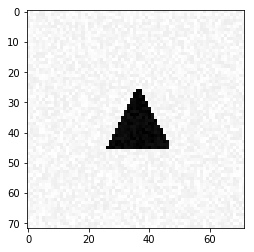

In [2]:
from mp1 import *
from keras.models import Sequential
from keras import metrics
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import numpy as np

IMAGE_WIDTH = 72
IMAGE_HEIGHT = IMAGE_WIDTH

## b.Load the dataset

In [3]:
[X_train_raw, Y_train_raw] = generate_dataset_classification(300, 20)
labels =  {0:'Rectangle', 1 : 'Disk', 2 : 'Triangle'}

[X_test_raw, Y_test_raw] = generate_test_set_classification()
# Because of Jupyer Notebook, we create _raw dataset lists 
# as we don't want to run transformation multiple times with X_train = X_train...

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## c.Dataset shaping

In [4]:
def transform_dataset(X_train_raw, Y_train_raw, dataset_reshaping=False):
    X_train = None
    Y_train = None
    
    if dataset_reshaping:
        print("X_train_raw shape : ", X_train_raw.shape)
        print("Y_train_raw shape : ", Y_train_raw.shape)
        print("\nReshaping dataset to '2D images'")
        X_train = X_train_raw.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)
        Y_train = np_utils.to_categorical(Y_train_raw)
    
    else:
        X_train = X_train_raw
        Y_train = np_utils.to_categorical(Y_train_raw, 3)
    
    return [X_train, Y_train]

X_train, Y_train = transform_dataset(X_train_raw, Y_train_raw)
print("X_train shape : ", X_train.shape)
print("Y_train shape : ", Y_train.shape)
print("labels : ", labels)

X_test, Y_test = X_test_raw, Y_test_raw
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)


# Get input shape
input_shape = X_train.shape[1:]
print("Using input shape : ", input_shape)

X_train shape :  (300, 5184)
Y_train shape :  (300, 3)
labels :  {0: 'Rectangle', 1: 'Disk', 2: 'Triangle'}
X_test shape :  (300, 5184)
Y_test shape :  (300, 3)
Using input shape :  (5184,)


## d.Model building

### Test model function

In [5]:
def test_model(_model, reshape=False):
    global labels
    
    les_X_test = {
        'Rectangle' : generate_a_rectangle(),
        'Disk' : generate_a_disk(),
        'Triangle': generate_a_triangle()[0]
         }

    for test_label, X_test in les_X_test.items():
        print("\nTrying to label a", test_label,"as test input")
        if reshape:
            X_test = X_test.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)
        else:
            X_test = X_test.reshape(1, X_test.shape[0])
        prediction = _model.predict(X_test)
        print(prediction)
        print("A", labels[np.argmax(prediction)], "is guessed")

### i.Model with SGD : Stochatic Gradient Descent

In [6]:
# Define model
model1 = Sequential()
model1.add(Dense(len(labels), activation = 'softmax', input_shape=input_shape))

# Define optimizer
sgd = SGD(lr=0.001, nesterov = True, momentum=0.9)

# Compiling
model1.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

# Fitting
model1.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)

In [7]:
# Testing
test_model(model1)


Trying to label a Rectangle as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Disk as test input
[[0. 1. 0.]]
A Disk is guessed

Trying to label a Triangle as test input
[[0. 0. 1.]]
A Triangle is guessed


We manage to reach great accuracies with this model, but use 'linear' instead of 'softmax' decrease model capacities.

### ii. Model with adam

In [8]:
# Define model
model2 = Sequential()
model2.add(Dense(len(labels), activation = 'softmax', input_shape=input_shape))

# Compiling
model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Fitting
model2.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)


In [9]:
# Testing
# scores = model2.evaluate(X_test, Y_test)
# print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
test_model(model2)


Trying to label a Rectangle as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Disk as test input
[[0. 1. 0.]]
A Disk is guessed

Trying to label a Triangle as test input
[[0. 0. 1.]]
A Triangle is guessed


Once again, with adam our model is able to identify test shapes.

# 4. Visualisation of the Solution

Model 1 : SGD


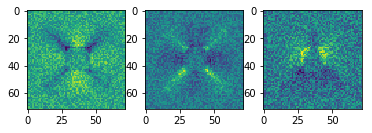

Model 2 : Adam


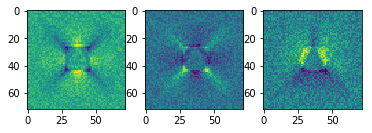

In [10]:
import matplotlib.pyplot as plt
def visualize(_model):
    weights = _model.get_weights()[0]
    fig = plt.figure()
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(weights[:, 0].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    fig.add_subplot(1, 3, 2)
    plt.imshow(weights[:, 1].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(weights[:, 2].reshape(IMAGE_WIDTH, IMAGE_HEIGHT))
    
    plt.show()

print("Model 1 : SGD")
visualize(model1)
print("Model 2 : Adam")
visualize(model2)

With this visualisation, we are able to recognise Rectangle, Disk and Triangle recognition.

# 5.A More Difficult Classification Problem

## a.Load the dataset

In [11]:
[X_train_raw2, Y_train_raw2] = generate_dataset_classification(300, 20, True)
X_train_2, Y_train_2 = transform_dataset(X_train_raw2, Y_train_raw2)

input_shape_2 = X_train_2.shape[1:]

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## b. Train the model

In [12]:
# Define optimizer
sgd = SGD(lr=0.001, nesterov = True, momentum=0.9)

model3 = Sequential()
model3.add(Dense(len(labels), activation='softmax', input_shape=input_shape_2))

# Compiling the model
model3.compile(
    loss='categorical_crossentropy', 
    optimizer=sgd, 
    metrics=['accuracy'])

# Fitting
model3.fit(X_train_2, Y_train_2, epochs=100, batch_size=32, verbose=0)

## c.Evaluate the model

In [13]:
# Testing
scores = model3.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))
test_model(model3)

300/300 [==============================] - 0s 131us/step
acc: 55.33%

Trying to label a Rectangle as test input
[[0. 1. 0.]]
A Disk is guessed

Trying to label a Disk as test input
[[0. 0. 1.]]
A Triangle is guessed

Trying to label a Triangle as test input
[[0. 0. 1.]]
A Triangle is guessed


The model is not able to classify well the new dataset. We should move to new technologies to improve our accuracy.

## d. CNN model

### i. Reshape the dataset

In [14]:
X_train_2r, Y_train_2r = transform_dataset(X_train_raw2, Y_train_raw2, dataset_reshaping=True)

input_shape_2r = X_train_2r.shape[1:]
print("Using now input shape", input_shape_2r)

X_train_raw shape :  (300, 5184)
Y_train_raw shape :  (300,)

Reshaping dataset to '2D images'
Using now input shape (72, 72, 1)


In [15]:
# Build the model
model4 = Sequential()
model4.add(
    Conv2D(
        filters=16, 
        kernel_size=(5, 5), 
        activation='relu', 
        input_shape=input_shape_2r
    )
)
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(len(labels), activation='softmax'))

# Define optimizer
sgd = SGD(lr=0.001, nesterov = True, momentum=0.9)

# Compiling the model
model4.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Fitting the model
model4.fit(X_train_2r, Y_train_2r, epochs=100, batch_size=32, verbose=0)

### ii. Evaluate the CNN model

In [16]:
# Testing
scores = model4.evaluate(X_test.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1), Y_test)
print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))
test_model(model4, reshape=True)

300/300 [==============================] - 0s 1ms/step
acc: 69.00%

Trying to label a Rectangle as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Disk as test input
[[1. 0. 0.]]
A Rectangle is guessed

Trying to label a Triangle as test input
[[1. 0. 0.]]
A Rectangle is guessed


We managed to improve our accuracy using CNNs

# 6. A Regression Problem

## a. Load the dataset

In [17]:
[X_train_raw3, Y_train_raw3] = generate_dataset_regression(500, 20)
X_train_3, _ = transform_dataset(X_train_raw3, Y_train_raw3, dataset_reshaping=True)
Y_train_3 = Y_train_raw3
print("X_train_3 shape : ", X_train_3.shape)
print("Y_train_3 shape : ", Y_train_3.shape)

input_shape_3 = X_train_3.shape[1:]
print("Using input shape", input_shape_3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
X_train_raw shape :  (500, 5184)
Y_train_raw shape :  (500, 6)

Reshaping dataset to '2D images'
X_train_3 shape :  (500, 72, 72, 1)
Y_train_3 shape :  (500, 6)
Using input shape (72, 72, 1)


## b. Prediction Visualsation

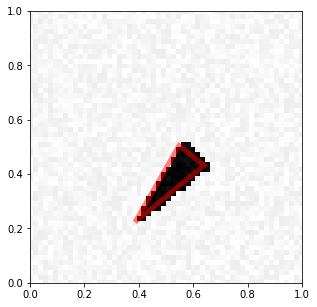

In [18]:
visualize_prediction(X_train_raw3[0], Y_train_raw3[0])

## c. CNN model using the Regression Dataset

In [19]:
# Building the model
model5 = Sequential()
model5.add(Conv2D(filters=32, 
                  kernel_size=(5, 5), 
                  activation='relu',
                  input_shape = input_shape_3
                 )
          )
model5.add(MaxPooling2D(pool_size=(3, 3)))
model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(3, 3)))
model5.add(Dropout(rate=0.5))
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(rate=0.5))
model5.add(Dense(6, activation='softmax'))

# Compiling          
model5.compile(loss='mean_squared_error', 
               optimizer='adam',
               metrics=['accuracy'])

# Fitting
model5.fit(
    X_train_3, 
    Y_train_3, 
    epochs=30, 
    batch_size=32,
    verbose=0
)


## d. Evaluate the CNN

In [20]:
# Load test dataset
[X_test_raw3, Y_test_raw3] = generate_test_set_regression()
X_test_3, _ = transform_dataset(X_test_raw3, Y_test_raw3, dataset_reshaping=True)
Y_test_3 = Y_test_raw3

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
X_train_raw shape :  (300, 5184)
Y_train_raw shape :  (300, 6)

Reshaping dataset to '2D images'


In [21]:
# Testing
scores = model5.evaluate(X_test_3, Y_test_3)
print("%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))

300/300 [==============================] - 1s 2ms/step
acc: 27.33%


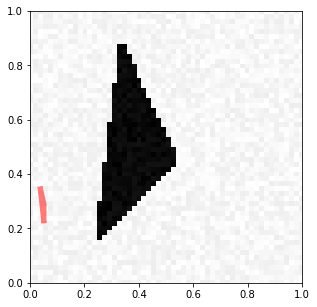

In [24]:
Y_predict_3 = model5.predict(X_test_3)
visualize_prediction(X_test_3[2], Y_predict_3[2])

Those performances are not really awesome, but as my computer is burning when running such models, I am not able to test to much of them.

# 7.Image Denoising

## a. Two images generation

In [25]:
def generate_a_drawing_2(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle_2(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return [generate_a_drawing_2(figsize, U, V, noise), generate_a_drawing_2(figsize, U, V, 0)]


def generate_a_disk_2(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return [generate_a_drawing_2(figsize, U, V, noise), generate_a_drawing_2(figsize, U, V, 0)]

def generate_a_triangle_2(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return [generate_a_drawing_2(figsize, U, V, noise), generate_a_drawing_2(figsize, U, V, 0)] 
    

def generate_dataset_classification_2(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle_2()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    #print('Creating data:')
    for i in range(nb_samples):
        noise = np.random.randint(255)
        #if i % 10 == 0:
            #print(i)
        category = np.random.randint(3)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle_2(noise, free_location)
            
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk_2(noise, free_location)
            
        else:
            [X[i], Y[i]] = generate_a_triangle_2(noise, free_location)
            
        X[i] = (X[i] + noise) / (255 + 2 * noise)
        Y[i] = Y[i] / 255
    return [X, Y]

def generate_test_set_classification_2():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification_2(300, free_location=True)
    return [X_test, Y_test]

## b. Load the dataset 

In [26]:
def reshape(vector):
    return vector.reshape(vector.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [27]:
X_train_raw5, Y_train_raw5 = generate_dataset_classification_2(300, free_location = True)
X_train_5, Y_train_5 = reshape(X_train_raw5), reshape(Y_train_raw5)
print("X_train_5 shape : ", X_train_5.shape)
print("Y_train_5 shape : ", Y_train_5.shape)

X_test_raw5, Y_test_raw5 = generate_test_set_classification_2()
X_test_5, Y_test_5 = reshape(X_test_raw5), reshape(Y_test_raw5)
print("X_test_5 shape : ", X_test_5.shape)
print("Y_test_5 shape : ", Y_test_5.shape)

input_shape_5 = X_train_5.shape[1:]
print("Using input shape", input_shape_5)

X_train_5 shape :  (300, 72, 72, 1)
Y_train_5 shape :  (300, 72, 72, 1)
X_test_5 shape :  (300, 72, 72, 1)
Y_test_5 shape :  (300, 72, 72, 1)
Using input shape (72, 72, 1)


## c.Noise visualisation

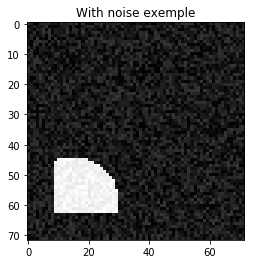

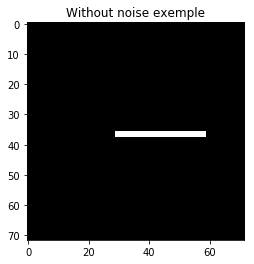

In [28]:
plt.imshow(X_train_5[0].reshape(IMAGE_WIDTH,IMAGE_HEIGHT), cmap="Greys")
plt.title('With noise exemple')
plt.show()


plt.imshow(Y_test_5[0].reshape(IMAGE_WIDTH,IMAGE_HEIGHT), cmap="Greys")
plt.title('Without noise exemple')
plt.show()

## d.Model training

In [29]:
from keras.models import Input, Model
from keras.layers import UpSampling2D, Conv2D, MaxPooling2D


model6 = Sequential()

model6.add(
    Conv2D(
        32,
        kernel_size=(3,3),
        activation='relu',
        input_shape=input_shape_5
    )
)
model6.add(MaxPooling2D((2, 2), padding='same'))

model6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D((2, 2), padding='same'))

model6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model6.add(UpSampling2D((2, 2)))

model6.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model6.add(UpSampling2D((2, 2)))

model6.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

model6.compile(optimizer="adam", loss='binary_crossentropy')
model6.fit(X_train_5, Y_train_5, epochs=10, batch_size=32, verbose=0)

We are now able te generate a denoised image thanks to the shape recogniton. We could expect better results with models train on a computer able to compute them during more time and with less danger for  the laptop with the CPU rise.

## e.Testing the model

In [30]:
def reshape_2(vector):
    return vector.reshape(IMAGE_WIDTH, IMAGE_HEIGHT)

In [31]:
Y_pred_5 = model6.predict(X_test_5)

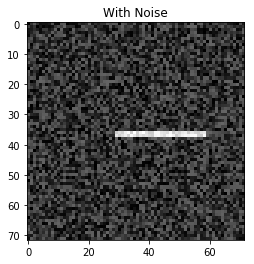

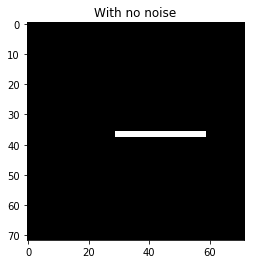

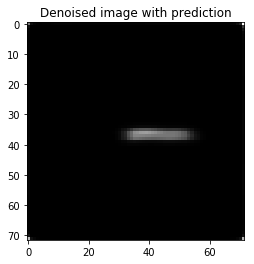

In [32]:
plt.imshow(reshape_2(X_test_5[0]), cmap= 'Greys')
plt.title('With Noise')
plt.show()

plt.imshow(reshape_2(Y_test_5[0]), cmap= 'Greys')
plt.title('With no noise')
plt.show()

plt.imshow(reshape_2(Y_pred_5[0]), cmap= 'Greys')
plt.title('Denoised image with prediction')
plt.show()

Even if the model is not optimum here, as my computer cannot compute too complex models, we can see that we manage to retrieve the shape of the original image denoised!